<a href="https://colab.research.google.com/github/argennof/M_Predi_Lluvias_Extremas_10/blob/main/TP2_Balbuena_Serrantes_Fonnegra_Velazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría "Predicción de lluvias extremas"

- Grupo 1:
  - Florencia Balbuena
  - Sebastián Serantes
  - Diana Fonnegra
  - Laura Velazquez

# TP 2: Análisis y Curación de Datos

In [ ]:
import pandas as pd
# import funciones 
# from funciones import get_hydro_year

Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/master/dataset/datos_diarios_cordoba.csv",\
                    parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas\
/master/dataset/metadatos_estaciones.csv")

## CONSIGNA TP2:

En este TP, nos enfocaremos en la cuenca del río Carcarañá. Por lo tanto, las estaciones que utilizaremos del dataset anterior son las siguientes:
- Pilar
- Rio Cuarto
- Marcos Juarez
- La Florida
- Pueblo Andino

En todos los casos, considerar el año hidrológico como del 1/agosto al 31/julio.


## 1. Análisis y curación de datos de una API - formato JSON

Referencias: https://darksky.net/dev/docs

  1. Extraer los datos para las coordenadas de las estaciones antes indicadas.
  2. ¿Cuántos años de datos hay?
  3. ¿Existen valores faltantes? Cuantificarlos.
  4. Generar un nuevo dataset a partir de los datos (time, summary, precipAccumulation, temperature, humidity, pressure, windSpeed, uvIndex, temperatureMin, temperatureMax.
  5. Hacer las conversiones de unidades necesarias a estos datos para poder compararlos con el dataset "datos_diarios_cordoba.csv".
  6. Comparar los estadísticos de estos datasets con los de cada estación.


## 2. Análisis y curación de datos de un Excel y un TXT

Referencias TerraClimate: http://www.climatologylab.org/terraclimate.html

  1. Leer los datos de "TerraClimate.csv" y determinar para cada variable los valores promedios anuales (correspondiente a cada año hidrológico).
  2. Hacer las conversiones de unidades necesarias para poder compararlos con cada estación.
  3. Determinar para las estaciones de la cuenca del Carcarañá, los valores promedios anuales (año hidrológico) y comparar los estadísticos de este dataset con los de "datos_diarios_cordoba.csv".
  4. Utilizar el dataset de TerraClimate para rellenar los datos faltantes en "datos_diarios_cordoba.csv" y guardar como un dataset nuevo. Hacer esto para todas las variables salvo para lluvia.
  5. Agregar las demás variables del dataset de TerraClimate al creado en el punto 4. 


## 3. Análisis y curación de datos de un Excel y un TXT

Referencias CHIRPS: https://disasters.nasa.gov/instruments/imerg

  1. En cada año hidrológico, leer los datos de "CHIRPS.txt" y determinar la Precipitaciones Máximas Diarias Anuales (PMDA) y las Precipitaciones Totales Anuales para cada estación.
  2. Graficar y comparar los estadísticos de estos datasets con los de cada estación (dataset "datos_diarios_cordoba.csv").
  3. ¿Es posible rellenar la serie del dataset "datos_diarios_cordoba.csv"?
  4. Agregar los nuevos features al dataset creado en el punto 5 de la parte 2 y exportar el dataset nuevo en formato csv.
  5. A partir del dataset del punto 4, elaborar matrices de correlación entre las diferentes variables y las series de Precipitaciones Máximas Diarias Anuales (PMDA) para cada estación.


## 4. Análisis y curación de Índices Climáticos en Excel

Referencias: https://psl.noaa.gov/data/climateindices/list/

  1. Leer el archivo "indices_clim.xlsx" y evaluar la cantidad de valores faltantes.
  2. Convertir los datos faltantes en NaN.
  3. Hacer matrices de correlación entre los diferentes índices climáticos y las series de Precipitaciones Máximas Diarias Anuales (PMDA) en las diferentes estaciones. Hacer esto para cada año hidrológico.
  4. Repetir lo mismo para la serie de caudales máximos diarios anuales (QMDA) en Pueblo Andino.

### Rta//
### Parte 1:


  1. Extraer los datos para las coordenadas de las estaciones:
 - Pilar
- Rio Cuarto
- Marcos Juarez
- La Florida
- Pueblo Andino

- En todos los casos, considerar el año hidrológico como del 1/agosto al 31/julio.







#### 1 a) Importamos algunas funcionalidades y los datos:

In [2]:
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.25)


import requests
import pandas as pd
from collections import namedtuple

In [3]:
def get_hydro_year(date_, start_month=7):
    
    ''' Función que define el año hidrológico
    en el caso del proyecto este se define entre el -> 1/agosto al 31/julio '''
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    
    return hydro_year

#### * Filtramos la información de interes a partir del conjunto de datos disponible en [Git](https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv). A su vez consideramos un grupo de estaciones:

In [2]:
ruta_git='https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/master/dataset/'

# Metadatos:
id_Datos=pd.read_csv(ruta_git + "metadatos_estaciones.csv", )
stations_dataset=id_Datos.copy()

# Convertimos el formato string de fecha a formato date-time pandas
id_Datos['fecha_inicio'] = pd.to_datetime(id_Datos.fecha_inicio)
id_Datos['Date_Month'] = pd.to_datetime(id_Datos.fecha_inicio.dt.strftime('%Y - %m'))

#Estaciones de interés:
zonas_int = ['Pilar Obs.','Rio Cuarto Aero','Marcos Juarez Aero','La Florida','Pueblo Andino']

# filtramos estas estaciones:
filtered_df = stations_dataset.loc[stations_dataset.nombre.isin(zonas_int)]


In [3]:
filtered_df

,id,omm_id,nombre,lon_grad,lon_min,lon_seg,lon_hem,lat_grad,lat_min,lat_seg,...,lon_dec,lat_dec,elev,institucion_id,nivel_adm1,nivel_adm2,fecha_inicio,tipo,pais_id,siglas
4,5,87349,Pilar Obs.,63,52,55.19,W,31,40,5.11,...,-63.881997,-31.668086,338,1,Cordoba,Rio Segundo,1/1/1907,C,AR,SMN
6,7,87453,Rio Cuarto Aero,64,16,37.10,W,33,5,43.80,...,-64.276973,-33.095500,421,1,Cordoba,Rio Cuarto,1/1/1875,C,AR,SMN
7,8,87467,Marcos Juarez Aero,62,9,1.85,W,32,40,46.91,...,-62.150513,-32.679697,114,1,Cordoba,Marcos Juarez,1/1/1947,C,AR,SMN
12,13,1,La Florida,64,46,59.00,W,32,13,59.00,...,-64.783000,-32.233000,1090,3,Cordoba,Calamuchita,1/1/1958,C,AR,BDHI
13,14,2,Pueblo Andino,60,52,26.00,W,32,40,8.00,...,-60.873889,-32.668889,9,3,Santa Fe,Iriondo,4/1/1980,Q,AR,BDHI


###   1. Extraer los datos para las coordenadas de las estaciones antes indicadas. 
###   2. ¿Cuántos años de datos hay?
Rta//:

### * Nota: la página presenta restricciones en cuanto a sus consultas (1000 por día, es por esta razón que se dejan indicadas las consultas de estacion puntual e iterando sobre el data frame: `filtered_df`)...
- Estaciones de manera individual:
  * Estación de muestra: 87453 - Rio cuarto Aero
  * Iniciando consulta desde: Thu Jul 01 2021 05:15:48 GMT+0000 - Unix: 1625116548.
  * Hasta:  Wed Jun 22 2022 21:21:00 GMT+0000 - Unix: 1655932860.
  * [Variables](https://www.home-assistant.io/integrations/darksky/#precip_probability) seleccionadas / Unidades SI.
      - time: horario en tiempo Unix.
      - summary: descripción.
      - precipAccumulation: precipitación en milímetros por día [mm] 
      - precipIntensity: precipitación en milímetros por hora [mm]
      - precipIntensityMax: precipitación máxima por hora en milímetros [mm]
      - precipProbability: probabilidad de precipitación.
      - precipType: tipo de precipitación que ocurre en el momento dado
      - humidity: húmedad atmosférica. [%]
      - pressure: presión barométrica en [[dyn/cm²](https://www.sensorsone.com/dyncm2-dyne-per-square-centimetre-pressure-unit/)].
      - windSpeed: velocidad del viento en kilometros por hora [km/h]
      - uvIndex: índice UV.
      - temperatureMin: temperatura mínima en Celsius [°C]
      - temperatureMax:temperatura máxima en Celsius [°C]
      - omm_esta: nombre de la estación
      - codigo: codificación OMM.

 

In [1]:
# # lon_dec=-64.783000
# # lat_dec=-32.233000
# # omm_esta = "La Florida"
# # codigo = 1
		
# # Listado de variables:
# var = 'time,summary,precipAccumulation,precipIntensity,precipIntensityMaxTime,\
# precipProbability,precipType,humidity,pressure,windSpeed,uvIndex,temperatureMin,temperatureMax,omm_id,nombre'
	
	
# # Transformo en listado
# features = var.split(',')
# # print(features) #Control de variables

# DailySummary = namedtuple("DailySummary", features)
# DailySummary

# df1 = pd.DataFrame()
# # key = '9349598e9f11f5eddceb6791daa6d787'
# # key = 'e6af5b5feb891b272e18f5e2fc0370a6'
# key = '117bcd7ca3a8e87bb63dff50b177f170'
# baseUrl="https://api.darksky.net/forecast"

# df2 = pd.DataFrame()
# lista_consulta=[]

# # Caracteristicas extraidas de metadato: 
# lon_dec=-62.150513
# lat_dec=-32.679697
# omm_esta = "Marcos Juarez Aero"
# codigo = 87467



# print(f'\nUrl para la estación: {omm_esta} - código: {codigo}')

# for unix in range(1659399660, 1690935660, 86400): 
# # for unix in range(1643588460, 1659399660, 86400): 
# # for unix in range(1593649260, 1659399660, 86400): # 2020 - 2022
#     consulta = f'{baseUrl}/{key}/{lat_dec},{lon_dec},{unix}?exclude=flags,hourly&units=ca'
#     print(consulta)
#     try:
#         r = requests.get(consulta)
#         data = r.json()
#         df = pd.DataFrame(list(data["daily"]["data"]))
#         df['omm_id'] = omm_esta
#         df['nombre'] = codigo
#         df2 = pd.concat([df2, df])
#         lista_consulta.append(data)
  
#     except:
#         # En caso que la consulta falle...
#         print(f'La estación: {omm_esta} - No posee datos para la fecha en formato unix: {unix}')
#         pass
#   break


#### * Primer resultado de la consulta - JSON:

In [49]:
# print(f'Resultado de las consultas \n {lista_consulta[0]}')


Resultado de las consultas 
 {'latitude': -32.679697, 'longitude': -62.150513, 'timezone': 'America/Argentina/Cordoba', 'currently': {'time': 1659399660, 'summary': 'Overcast', 'icon': 'cloudy', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 15.05, 'apparentTemperature': 15.05, 'dewPoint': 7.27, 'humidity': 0.6, 'pressure': 1014.2, 'windSpeed': 14.93, 'windGust': 26.29, 'windBearing': 71, 'cloudCover': 0.96, 'uvIndex': 0, 'visibility': 16.093, 'ozone': 289.7}, 'daily': {'data': [{'time': 1659322800, 'summary': 'Mostly cloudy throughout the day.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1659351600, 'sunsetTime': 1659389580, 'moonPhase': 0.13, 'precipIntensity': 0, 'precipIntensityMax': 0, 'precipProbability': 0, 'temperatureHigh': 22.84, 'temperatureHighError': 4.63, 'temperatureHighTime': 1659377400, 'temperatureLow': 9.44, 'temperatureLowError': 4.63, 'temperatureLowTime': 1659433680, 'apparentTemperatureHigh': 22.56, 'apparentTemperatureHighTime': 1659377400, 'appar

#### * Las transformamos en DataFrame: `res` y vemos el primer registro del mismo.

In [50]:
# res = pd.DataFrame(df2, columns=features)
# res.reset_index(drop=True)
# res.head(1)


,time,summary,precipAccumulation,precipIntensity,precipIntensityMaxTime,precipProbability,precipType,humidity,pressure,windSpeed,uvIndex,temperatureMin,temperatureMax,omm_id,nombre
0,1659322800,Mostly cloudy throughout the day.,NaN,0.0,NaN,0.0,NaN,0.59,1015.4,11.01,3,7.43,22.84,Marcos Juarez Aero,87467


  ### 3. ¿Existen valores faltantes? Cuantificarlos.
  - Las variables que presentan datos faltantes son:


In [ ]:
# print(res.info())

# # al parecer en la descarga no se presentaban datos faltantes:
# res['precipIntensity'].isna().sum()

#### * Calculamos la precipitación acumulada diaria y transformamos el tiempo Unix escalas convecionales: 
- precipAccumulation = precipIntensity * 24 hr obtenida de [Foro](https://stackoverflow.com/questions/55866558/should-darksky-time-machine-historical-data-show-precipaccumulation-when-preci)

In [51]:
# from datetime import datetime

# # transformando de tiempo Unix a unidades convencionales:
# res['Date'] = pd.to_datetime(res["time"], unit = 's').dt.strftime("%Y-%m-%d")

# # Calculamos la precipitación acumulada:
# res['precipAccumulation']= res['precipIntensity']*24 # 24 hrs
# res['temperatura'] = (res['temperatureMax'] + res['temperatureMin']) * 0.5 

In [52]:
# res.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    365 non-null    int64  
 1   summary                 10 non-null     object 
 2   precipAccumulation      11 non-null     float64
 3   precipIntensity         11 non-null     float64
 4   precipIntensityMaxTime  8 non-null      float64
 5   precipProbability       11 non-null     float64
 6   precipType              8 non-null      object 
 7   humidity                365 non-null    float64
 8   pressure                365 non-null    float64
 9   windSpeed               365 non-null    float64
 10  uvIndex                 365 non-null    int64  
 11  temperatureMin          365 non-null    float64
 12  temperatureMax          365 non-null    float64
 13  omm_id                  365 non-null    object 
 14  nombre                  365 non-null    int6

- Algunas de las anteriores seran eliminadas dado que no aportan información relevante.

3. Generar un nuevo dataset a partir de los datos (time, summary, precipAccumulation, temperature, humidity, pressure, windSpeed, uvIndex, temperatureMin, temperatureMax.
- Rta//:

In [53]:
# df_mj = res.loc[:,['Date','omm_id','nombre','summary','temperatura', 'humidity', 'pressure', \
#                           'windSpeed', 'uvIndex', 'temperatureMin', 'temperatureMax','precipAccumulation' ]].copy()

- Verificamos la presencia de datos faltantes:

In [ ]:
# import missingno as msno
# msno.matrix(df_mj,figsize=(20, 6), fontsize=12, color=[0,0,0.2])

- Del anterior concluimos que la información descargada no presenta valores faltantes.
  * Luego, almacenamos los datos en formato CSV:

In [55]:
# df_mj.to_csv('mjc.csv', sep=';',index=False)
# from google.colab import files
# files.download('mjc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# df_lf = df_florida.copy()
# df_lf['Date'] = pd.to_datetime(df_lf['Date'])


* Almacenando los datos en formato .TXT:

In [ ]:
# listitems = lista_consulta.copy()
# with open('consulta_87453_r4.txt', 'w') as temp_file:
#     for item in listitems:
#         temp_file.write("%s\n" % item)
# file = open('consulta_87453_r4.txt', 'r')
# #print(file.read()])
# print(listitems[0])

In [ ]:
# from google.colab import files
# files.download('consulta_87453_r4.txt')


### Nota 2: * Se realizó una prueba iterando a todas las estaciones [Script - todas las estaciones](https://github.com/argennof/M_Predi_Lluvias_Extremas_10/blob/main/todas_estaciones_consulta.py). 

#### 4. Hacer las conversiones de unidades necesarias a estos datos para poder compararlos con el dataset "datos_diarios_cordoba.csv".
- Cargamos los datos almacenados en el repositorio -  87453_rio_cuarto.csv



In [30]:
df_laflorida = pd.read_csv("https://github.com/argennof/M_Predi_Lluvias_Extremas_10/\
blob/main/dark_sky/1_florida.csv?raw=true", sep=';', parse_dates = True)

df_lf = df_laflorida.copy()
df_lf['Date'] = pd.to_datetime(df_lf['Date'])


- Para comparar las variables transformamos algunas de las unidades presentes en el conjunto.

In [31]:
# transformaciones de unidades
df_lf['pressure_hpa'] = round(df_lf.pressure * 0.001,3) 
df_lf['windSpeed_ms'] = round(df_lf.windSpeed * (1/3.6),3)
df_lf['hydro_year'] = df_lf['Date'].apply(lambda Date: get_hydro_year(Date))
df_lf.sort_values('Date').head(3)

,Date,omm_id,nombre,summary,temperatura,humidity,pressure,windSpeed,uvIndex,temperatureMin,temperatureMax,precipAccumulation,pressure_hpa,windSpeed_ms,hydro_year
0,2020-12-03,La Florida,1,NaN,19.320,0.48,1010.6,8.54,10,13.85,24.79,3.8400,1.011,2.372,2020
1,2020-12-04,La Florida,1,Overcast throughout the day.,14.045,0.61,1021.9,8.10,5,9.41,18.68,1.2840,1.022,2.250,2020
2,2020-12-05,La Florida,1,Partly cloudy throughout the day.,13.180,0.54,1023.4,9.38,10,6.98,19.38,0.1152,1.023,2.606,2020


- Extraemos las columnas de interés ya transformadas y renombramos algunas para que coincidan con las del Dataset de  Datos diarios de Córdoba:

In [32]:
df_lf2 = df_lf.loc[:,['Date','omm_id','nombre','summary','precipAccumulation','humidity', 'pressure_hpa', \
                          'windSpeed_ms', 'uvIndex', 'temperatura','temperatureMin', 'temperatureMax', 'hydro_year']].copy()

# Renombramos algunas columnas para que coincidan con datos de Córdoba:
df_lf2 = df_lf2.rename(columns={'temperatura':'rango_tmp','temperatureMin':'tmin', 'temperatureMax':'tmax',\
                                'precipAccumulation':'prcp', 'humidity':'hr','windSpeed_ms':'vmax_f', \
                                'pressure_hpa':'pres_est','omm_id':'station','nombre':'omm_id'})
df_lf2 = df_lf2.drop(columns=['summary', 'uvIndex'])

In [33]:
df_lf2

,Date,station,omm_id,prcp,hr,pres_est,vmax_f,rango_tmp,tmin,tmax,hydro_year
0,2020-12-03,La Florida,1,3.8400,0.48,1.011,2.372,19.320,13.85,24.79,2020
1,2020-12-04,La Florida,1,1.2840,0.61,1.022,2.250,14.045,9.41,18.68,2020
2,2020-12-05,La Florida,1,0.1152,0.54,1.023,2.606,13.180,6.98,19.38,2020
3,2020-12-06,La Florida,1,0.0168,0.60,1.019,2.583,15.890,8.83,22.95,2020
4,2020-12-07,La Florida,1,0.0288,0.61,1.014,2.831,17.500,10.23,24.77,2020
...,...,...,...,...,...,...,...,...,...,...,...
601,2022-07-27,La Florida,1,0.2544,0.87,1.015,1.297,12.235,8.36,16.11,2022
602,2022-07-28,La Florida,1,0.0000,0.45,1.020,3.317,10.185,5.02,15.35,2022
603,2022-07-29,La Florida,1,0.0000,0.22,1.019,2.411,12.160,4.81,19.51,2022
604,2022-07-30,La Florida,1,0.0000,0.26,1.013,2.300,13.130,6.92,19.34,2022


- Agrupamos los datos:

In [34]:
### Acumulado precipitación - Renombro:
df_PTA_lf = df_lf2[['hydro_year','omm_id','prcp']].groupby(['hydro_year', 'omm_id']).sum()
df_PTA_lf.rename(columns={'prcp':'prcp_PTA'},inplace=True)

# prcp	hr	pres_est	vmax_f	rango_tmp	tmin	tmax
### Máximos por variable - PMDA - Renombro: 
df_max_lf = df_lf2[['hydro_year','omm_id','prcp','hr','tmax','vmax_f',\
                                   'pres_est', 'rango_tmp']].groupby(['hydro_year', 'omm_id']).max()

df_max_lf.rename(columns={'prcp':'prcp_PMDA','hr':'hr_max_hy','tmax':'tmax_hy',\
                       'vmax_f':'vmax_f_hy','pres_est':'pres_est_max_hy',\
                        'rango_tmp':'rango_tmp_max_hy'},inplace=True)

### Mínimos por variable - PMDA - Renombro: 
df_min_lf = df_lf2[['hydro_year','omm_id','hr','tmin', 'pres_est','rango_tmp']].groupby(['hydro_year', 'omm_id']).min()

df_min_lf.rename(columns={'hr':'hr_min_hy','tmin':'tmin_hy',\
                       'pres_est':'pres_est_min_hy','rango_tmp':'rango_tmp_min_hy'},
                     inplace=True)
                        
### Promedios por variable - Renombro: 
excepto =['id', 'station', 'prcp','tmax','vmax_f','tmin']
df_prom_lf = round(df_lf2.loc[:, df_lf2. columns.difference(excepto)
                                                         ].groupby(['hydro_year', 'omm_id']).mean(),4)

df_prom_lf.rename(columns={'hr':'hr_prom_hy','pres_est':'pres_est_prom_hy',\
                              'rango_tmp':'rango_tmp_prom_hy'},
                     inplace=True)

In [35]:
print(df_PTA_lf)
print(df_max_lf)
print(df_min_lf)
print(df_prom_lf)

                   prcp_PTA
hydro_year omm_id          
2020       1       521.6784
2021       1       699.5424
2022       1        16.4976
                   prcp_PMDA  hr_max_hy  tmax_hy  vmax_f_hy  pres_est_max_hy  \
hydro_year omm_id                                                              
2020       1         39.0936       0.99    33.24      5.753            1.028   
2021       1         35.8200       1.00    35.83      5.731            1.032   
2022       1          7.2168       0.91    24.60      3.317            1.030   

                   rango_tmp_max_hy  
hydro_year omm_id                    
2020       1                 25.695  
2021       1                 28.670  
2022       1                 16.465  
                   hr_min_hy  tmin_hy  pres_est_min_hy  rango_tmp_min_hy
hydro_year omm_id                                                       
2020       1            0.30     3.31            1.003             7.040
2021       1            0.16    -3.35            1

In [36]:
df1= df_PTA_lf.merge(df_max_lf, on=['omm_id','hydro_year']) # PTA y maximos
df2 = df1.merge(df_min_lf, on=['omm_id','hydro_year']) # PTA_maximos y minimos
df3 = df2.merge(df_prom_lf, on=['omm_id','hydro_year']) # PTA_maximos_minimos_prom
df3 

- Nota 3: al realizar multiples consultas a la pagina tan solo se obtuvieron datos para el año 2021. Para efectos de visualización mostramos la distribución de cada una de las variables obtenidas.

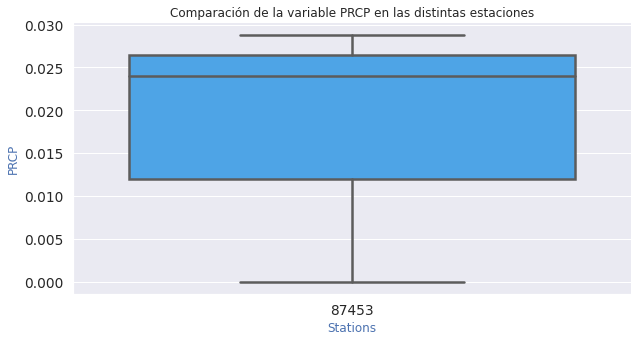

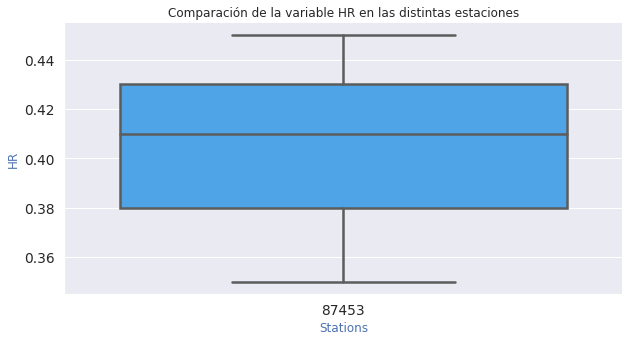

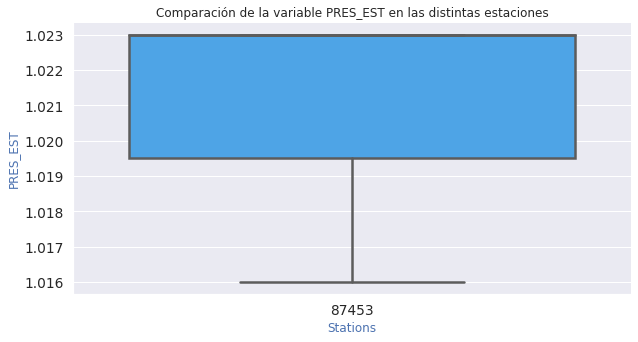

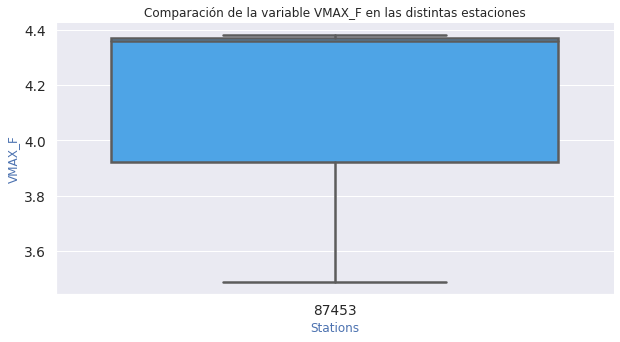

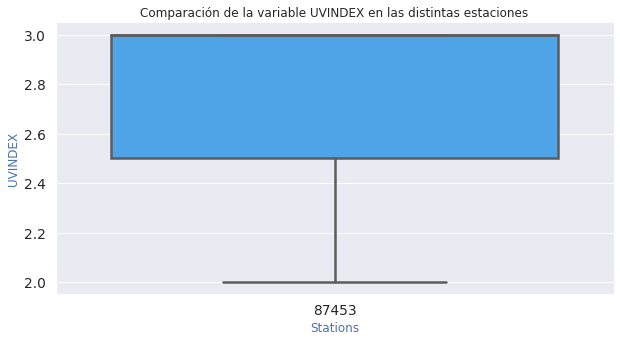

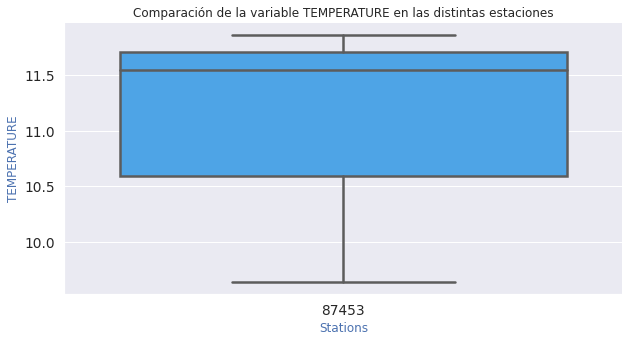

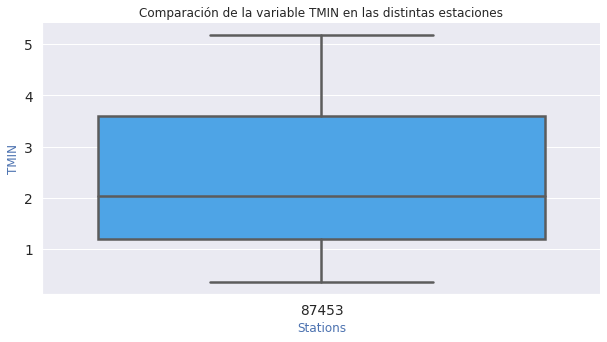

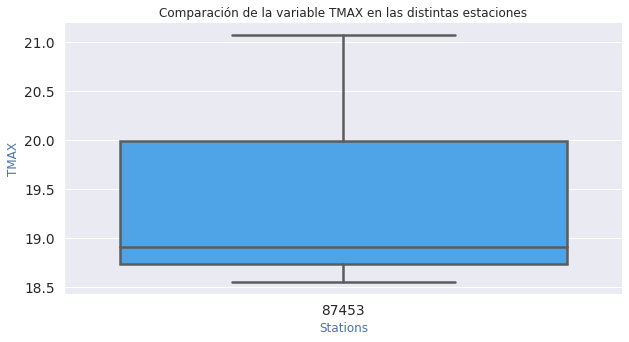

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.25)


BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

dataset_with_stations = df_lf2.copy()
not_numeric_cols = ['Date', 'id', 'omm_id', 'nombre', 'hydro_year', 'summary']
numeric_cols = [c for c in dataset_with_stations.columns if c not in not_numeric_cols]


for numeric_col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=dataset_with_stations,
                    x='nombre', y=numeric_col,
                    color=BLUE,linewidth=2.5)
    plt.ylabel(numeric_col.upper(), fontsize=12, color='b')
    plt.xlabel('Stations',fontsize=12, color='b')
    plt.title(f'Comparación de la variable {numeric_col.upper()} en las distintas estaciones', fontsize=12)
    #plt.xticks(rotation=90)
    sns.despine()

- Importamos el conjunto: datos_diarios_cordoba.csv y lo llamamos: `df_dcor`

In [ ]:
df_dcor = pd.read_csv("https://raw.githubusercontent.com/Rondamon/\
2022_Mentoria_LluviasExtremas/main/dataset/datos_diarios_cordoba.csv?raw=true",parse_dates = True)
df_dcor['fecha'] = pd.to_datetime(df_dcor['fecha'])

- Obtenemos el año hidrologico:

In [ ]:
df_dcor['hydro_year'] = df_dcor['fecha'].apply(lambda Date: get_hydro_year(Date))
df_dcor.sort_values('hydro_year')
df_dcor.shape

(249627, 18)

- Nota 4: al observar los datos notamos que para la estación 87453, no se presentan registros para los años superiores a 2019.

In [ ]:
df_dcor.tail(5)

,id,omm_id,fecha,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,hydro_year
249622,249623,2,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50303,2017
249623,249624,2,2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.93904,2017
249624,249625,2,2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33246,2017
249625,249626,2,2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.72549,2017
249626,249627,2,2017-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.23680,2017


In [ ]:
not_var_cols = ['fecha', 'id', 'omm_id', 'nombre', 'hydro_year', 'summary']
var_cols = [c for c in df_dcor.columns if c not in not_var_cols]
df_dcor_var = df_dcor[var_cols]
df_dcor_var_mean = pd.DataFrame()

for col in var_cols:
    df_dcor_var_mean[col] = df_dcor.groupby(['omm_id','hydro_year'])[col].mean()
    
df_prueba = df_dcor_var_mean.reset_index()

# df_prueba.loc[(df_prueba['omm_id']==87453) & (df_prueba['hydro_year']==2021), :]
df_prueba.loc[(df_prueba['omm_id']==87453)].tail(5)


,omm_id,hydro_year,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
455,87453,2015,6.215015,69.571038,4.398907,2.453279,965.577869,1014.506557,9.753279,22.478962,16.314481,11.105738,24.238636,13.719318,4.223497,NaN
456,87453,2016,7.231339,66.808219,3.509589,1.531507,966.009041,1014.930411,9.170411,23.003343,16.503288,10.887945,21.593607,14.936530,4.856712,NaN
457,87453,2017,7.307143,63.101370,3.542466,1.394521,965.010685,1013.764932,8.765479,24.134521,17.148493,11.212958,20.986226,15.138567,5.169863,NaN
458,87453,2018,6.703562,67.200000,3.824658,2.925753,966.067123,1015.030685,9.107397,22.809863,16.281370,10.777808,17.472622,13.523343,5.056438,NaN
459,87453,2019,6.493243,60.108108,3.373874,1.942793,966.113063,1015.218468,6.327928,22.716667,15.455405,9.664253,18.407407,13.020370,4.975225,NaN


In [ ]:
df_prueba.to_csv('bbd_pta_parte_b.csv', sep=';',index=False)

from google.colab import files
files.download('bbd_pta_parte_b.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Análisis y curación de datos de un Excel y un TXT

1. Leer los datos de "TerraClimate.csv" y determinar para cada variable los valores promedios anuales (correspondiente a cada año hidrológico).


* Leemos los datos del archivo "TerraClimate.csv" y los guardamos en nuestro dataset.

In [26]:
datos_tc = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/main/dataset/TerraClimate.csv")
datos_tc.head(5)

,Date,Lluvia_mm,ETreal_mm,HumedadSuelo_mm,RadSolar_Wpm2,Temp_Min,Temp_Max,PresionVapor_hPa,VelViento_mps,IndicePalmer_porc,id,omm_id,nombre
0,1-Jan-58,165.0,1570.0,32.0,281.3,15.4,29.8,19.59,3.27,0.78,5,87349,Pilar Obs.
1,1-Feb-58,75.0,713.0,30.0,246.3,15.8,29.5,20.88,3.08,-0.45,5,87349,Pilar Obs.
2,1-Mar-58,119.0,1123.0,33.0,213.5,13.0,26.1,17.72,3.31,0.23,5,87349,Pilar Obs.
3,1-Apr-58,33.0,313.0,31.0,151.6,10.7,23.3,15.13,2.65,-0.46,5,87349,Pilar Obs.
4,1-May-58,13.0,119.0,28.0,109.8,6.1,19.8,10.86,2.91,-0.76,5,87349,Pilar Obs.


* Asignamos el año hidrologico correspondinte a cada registro.

In [27]:
datos_tc['Date'] = pd.to_datetime(datos_tc['Date'], format="%d-%b-%y")

In [21]:
# cy = pd.to_datetime('now').year
# datos_tc.Date = datos_tc.Date.mask(datos_tc.Date.dt.year.gt(cy), 
#                                    datos_tc.Date - pd.offsets.DateOffset(years=100))


In [29]:
datos_tc['Date'] = pd.to_datetime(datos_tc['Date'])
datos_tc['Date'] = datos_tc['Date'].mask(datos_tc['Date'].dt.year > 2019, 
                                        datos_tc['Date'] - pd.offsets.DateOffset(years=100))
datos_tc['hydro_year'] = datos_tc['Date'].apply(lambda Date: get_hydro_year(Date))
datos_tc.head(5)

,Date,Lluvia_mm,ETreal_mm,HumedadSuelo_mm,RadSolar_Wpm2,Temp_Min,Temp_Max,PresionVapor_hPa,VelViento_mps,IndicePalmer_porc,id,omm_id,nombre,hydro_year
0,1958-01-01,165.0,1570.0,32.0,281.3,15.4,29.8,19.59,3.27,0.78,5,87349,Pilar Obs.,1957
1,1958-02-01,75.0,713.0,30.0,246.3,15.8,29.5,20.88,3.08,-0.45,5,87349,Pilar Obs.,1957
2,1958-03-01,119.0,1123.0,33.0,213.5,13.0,26.1,17.72,3.31,0.23,5,87349,Pilar Obs.,1957
3,1958-04-01,33.0,313.0,31.0,151.6,10.7,23.3,15.13,2.65,-0.46,5,87349,Pilar Obs.,1957
4,1958-05-01,13.0,119.0,28.0,109.8,6.1,19.8,10.86,2.91,-0.76,5,87349,Pilar Obs.,1957


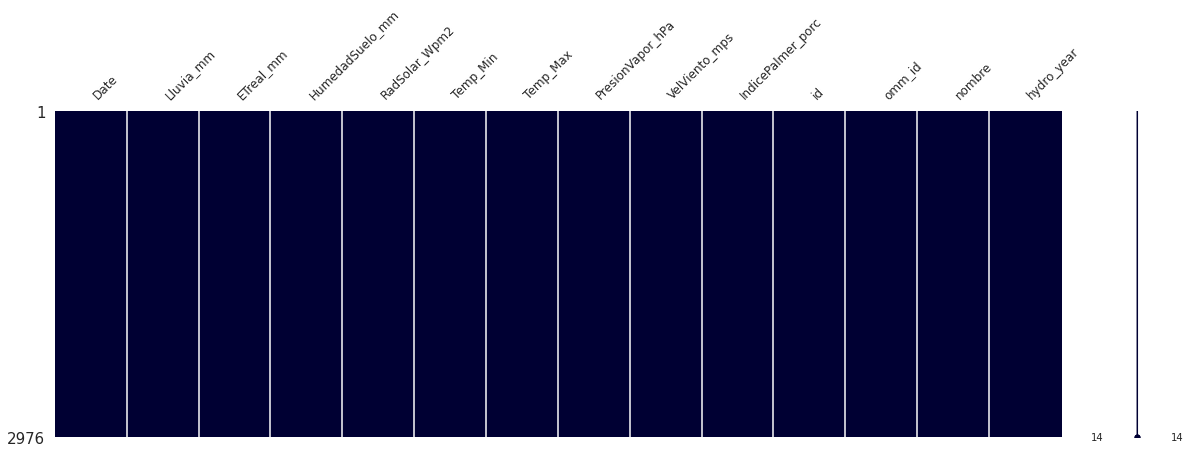

In [70]:
import missingno as msno
msno.matrix(datos_tc,figsize=(20, 6), fontsize=12, color=[0,0,0.2])

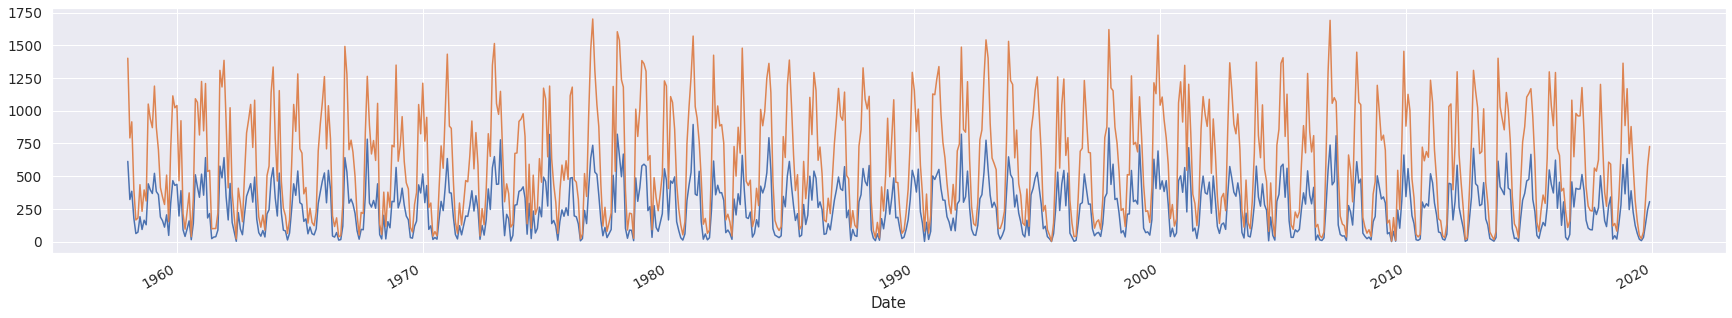

In [63]:
## create time series
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,5))

ts = datos_tc.groupby("Date")["Lluvia_mm"].sum().rename("PTA")
ts2 = datos_tc.groupby("Date")["ETreal_mm"].mean().rename("ETR")
ts.plot()
ts2.plot()
plt.show()

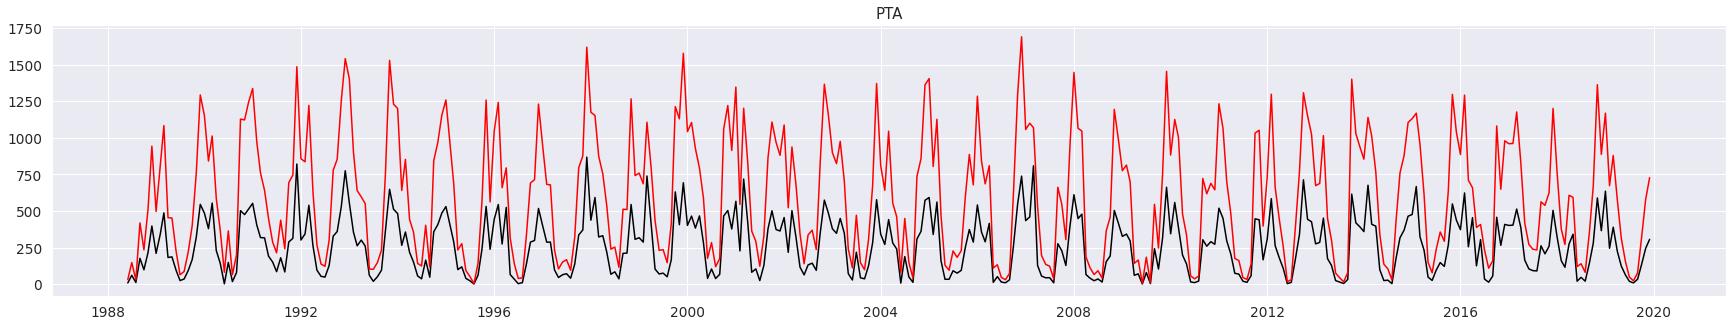

In [69]:
fig, ax = plt.subplots(figsize=(30,5))
ts.rolling(window=365).sum()   
ts2.rolling(window=365).mean()   
plt.title(ts.name)    
plt.plot(ts[365:], label='PTA', color="black") 
plt.plot(ts2[365:], label='ETR', color="Red") 

* Calculamos la media anual (año hidrologico) de cada una de las variables para cada una de las estaciones de interes.

In [ ]:
not_var_cols = ['Date', 'id', 'omm_id', 'nombre', 'hydro_year']
var_cols = [c for c in datos_tc.columns if c not in not_var_cols]
datos_tc_var = datos_tc[var_cols]
datos_tc_var_mean = pd.DataFrame()

for col in var_cols:
  datos_tc_var_mean[col] = datos_tc.groupby(['omm_id','hydro_year'])[col].mean()

datos_tc_var_mean

Lluvia_mm   ETreal_mm  HumedadSuelo_mm  RadSolar_Wpm2  \
omm_id hydro_year                                                          
1      1957        66.600000  632.800000        45.400000     200.960000   
       1958        59.416667  564.000000        30.666667     189.958333   
       1959        54.833333  519.583333        20.666667     191.216667   
       1960        69.250000  643.583333        53.916667     193.958333   
       1961        55.750000  533.916667        84.416667     195.908333   
...                      ...         ...              ...            ...   
87466  2015        85.833333  722.666667       165.250000     188.975000   
       2016        83.416667  753.666667       209.750000     200.050000   
       2017        70.916667  636.083333       185.000000     206.616667   
       2018        75.916667  753.583333       158.416667     198.408333   
       2019        31.857143  301.714286        47.000000     196.514286   

                    Temp_Min   Temp_Max  PresionVapor_hPa  VelViento_mps  \
omm_id hydro_year                                                          
1      1957         8.360000  22.320000         11.452000       3.946000   
       1958         5.866667  19.916667          8.875833       4.153333   
       1959         5.316667  21.208333          9.230833       4.045833   
       1960         5.975000  20.766667          9.322500       4.111667   
       1961         6.191667  20.650000          9.508333       4.167500   
...                      ...        ...               ...            ...   
87466  2015        10.750000  23.783333         14.811667       3.440000   
       2016        10.500000  23.650000         14.382500       3.509167   
       2017        11.133333  24.625000         14.662500       3.678333   
       2018        10.125000  23.450000         14.905000       3.711667   
       2019         9.414286  22.585714         11.555714       3.954286   

                   IndicePalmer_porc  
omm_id hydro_year                     
1      1957                -0.054000  
       1958                 0.305833  
       1959                 1.140833  
       1960                 0.762500  
       1961                 1.642500  
...                              ...  
87466  2015                 0.444167  
       2016                 2.520000  
       2017                -0.045000  
       2018                 0.440833  
       2019                -2.568571  

[252 rows x 9 columns]

2. Hacer las conversiones de unidades necesarias para poder compararlos con cada estación.

* Rta: Dado que ambas bases de datos se encuentran en las mismas unidades, no es necesario realizar conversiones.

3. Determinar para las estaciones de la cuenca del Carcarañá, los valores promedios anuales (año hidrológico) y comparar los estadísticos de este dataset con los de "datos_diarios_cordoba.csv".

* Leemos los datos de "datos_diaros_cordoba.csv" y agregamos el año hidrologico.

In [ ]:
datos_dcor = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/main/dataset/datos_diarios_cordoba.csv")
datos_dcor['fecha'] = pd.to_datetime(datos_dcor['fecha'])
datos_dcor['hydro_year'] = datos_dcor['fecha'].apply(lambda Date: get_hydro_year(Date))
datos_dcor

,id,omm_id,fecha,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,hydro_year
0,1,87244,1961-01-01,NaN,62.0,0.0,0.0,965.9,NaN,15.9,32.3,25.1,13.5,NaN,NaN,1.0,NaN,1960
1,2,87244,1961-01-02,NaN,66.0,6.0,28.0,969.9,NaN,15.5,27.5,22.2,18.3,NaN,NaN,1.0,NaN,1960
2,3,87244,1961-01-03,NaN,92.0,8.0,15.4,972.6,NaN,13.1,21.7,14.4,12.9,NaN,NaN,4.5,NaN,1960
3,4,87244,1961-01-04,NaN,84.0,5.0,0.0,969.6,NaN,17.4,23.1,20.4,13.9,NaN,NaN,0.3,NaN,1960
4,5,87244,1961-01-05,NaN,84.0,5.0,3.6,965.6,NaN,17.8,23.9,20.7,15.5,NaN,NaN,1.5,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249622,249623,2,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50303,2017
249623,249624,2,2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.93904,2017
249624,249625,2,2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33246,2017
249625,249626,2,2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.72549,2017


* Para poder comparar ambos datasets filtramos en el de Datos Diarios Cordoba las estaciones que se encuentran en TerraClimate.

In [ ]:
datos_dcor_filtered = datos_dcor.query('omm_id == 1|omm_id == 87349|omm_id==87453|omm_id==87466')
datos_dcor_filtered

,id,omm_id,fecha,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,hydro_year
86228,86229,87349,1961-01-01,12.0,66.0,0.0,0.0,963.8,NaN,17.5,NaN,25.4,18.3,NaN,NaN,1.5,NaN,1960
86229,86230,87349,1961-01-02,7.2,59.0,5.0,15.8,968.9,NaN,13.3,NaN,22.0,17.2,NaN,NaN,1.9,NaN,1960
86230,86231,87349,1961-01-03,2.8,87.0,6.0,3.4,972.4,NaN,14.5,NaN,16.7,13.4,NaN,NaN,1.9,NaN,1960
86231,86232,87349,1961-01-04,10.2,80.0,4.0,0.8,969.5,NaN,15.8,NaN,19.6,12.5,NaN,NaN,2.3,NaN,1960
86232,86233,87349,1961-01-05,5.5,90.0,5.0,13.5,966.1,NaN,17.3,NaN,19.0,15.6,NaN,NaN,1.0,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237125,237126,1,2018-11-25,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
237126,237127,1,2018-11-26,NaN,NaN,NaN,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
237127,237128,1,2018-11-27,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
237128,237129,1,2018-11-28,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


* Calculamos la media anual (año hidrologico) de cada una de las variables para cada una de las estaciones.

In [ ]:
not_var_cols = ['fecha', 'id', 'omm_id', 'hydro_year']
var_cols = [c for c in datos_dcor.columns if c not in not_var_cols]
datos_dcor_var = datos_dcor_filtered[var_cols]
datos_dcor_var_mean = pd.DataFrame()

for col in var_cols:
  datos_dcor_var_mean[col] = datos_dcor_filtered.groupby(['omm_id','hydro_year'])[col].mean()

datos_dcor_var_mean

* Calculamos los estadisticos (media y desvio estandar) por variable y por estacion de "datos_diarios_cordoba.csv"

In [ ]:
not_var_cols = ['fecha', 'id', 'omm_id', 'hydro_year']
var_cols = [c for c in datos_dcor_filtered.columns if c not in not_var_cols]
datos_dcor_mean = pd.DataFrame()

for col in var_cols:
    datos_dcor_mean[col] = datos_dcor_filtered.groupby(['omm_id'])[col].mean()

datos_dcor_mean

,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
omm_id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,2.834483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87349,7.424268,66.157851,3.812968,2.133873,975.262220,1014.518895,10.269440,24.133003,17.747075,11.420270,21.035264,5.857528,2.372935,NaN
87453,6.609220,65.787048,3.586205,2.306476,965.081506,1013.700374,8.897176,23.011788,16.403969,11.013634,17.105527,10.956648,4.498109,NaN
87466,7.191224,69.360235,NaN,2.456509,NaN,NaN,12.204983,24.069181,NaN,11.530021,NaN,NaN,2.489087,NaN


In [ ]:
datos_dcor_std = pd.DataFrame()

for col in var_cols:
  datos_dcor_std[col] = datos_dcor_filtered.groupby(['omm_id'])[col].std()

datos_dcor_std

,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
omm_id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,9.748984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87349,3.813025,16.017916,2.631480,7.902338,5.667356,6.412557,6.838612,6.310424,6.039322,6.049610,12.124784,4.216085,1.585924,NaN
87453,3.842550,16.516053,2.595433,8.013830,5.470323,6.420998,6.746978,6.571820,6.037799,5.810269,12.533807,5.133788,2.494674,NaN
87466,3.835367,12.670993,NaN,8.957003,NaN,NaN,6.034129,6.430590,NaN,6.310511,NaN,NaN,1.621017,NaN


* Calculamos los estadisticos (media y desvio estandar) por variable y por estacion de Terra Climate

In [ ]:
not_var_cols = ['omm_id', 'hydro_year','Date','nombre','id']
var_cols = [c for c in datos_tc.columns if c not in not_var_cols]
datos_tc_mean = pd.DataFrame()

for col in var_cols:
  datos_tc_mean[col] = datos_tc.groupby(['omm_id'])[col].mean()

datos_tc_mean

,Lluvia_mm,ETreal_mm,HumedadSuelo_mm,RadSolar_Wpm2,Temp_Min,Temp_Max,PresionVapor_hPa,VelViento_mps,IndicePalmer_porc
omm_id,,,,,,,,,
1,56.853495,537.079301,55.181452,199.002151,6.607392,20.556452,9.467083,4.558118,0.044167
87349,65.793011,609.658602,76.704301,199.422715,10.504839,24.003629,14.148078,3.766129,0.068280
87453,63.661290,601.024194,68.344086,196.672984,9.846909,23.183333,12.245403,3.726169,0.181142
87466,76.866935,700.884409,160.251344,196.912231,10.285887,23.640323,14.185497,3.506237,0.376438


In [ ]:
datos_tc_std = pd.DataFrame()

for col in var_cols:
  datos_tc_std[col] = datos_tc.groupby(['omm_id'])[col].std()

datos_tc_std

,Lluvia_mm,ETreal_mm,HumedadSuelo_mm,RadSolar_Wpm2,Temp_Min,Temp_Max,PresionVapor_hPa,VelViento_mps,IndicePalmer_porc
omm_id,,,,,,,,,
1,41.853539,381.676571,64.494248,64.680234,4.727641,4.971248,3.304909,0.594908,2.371626
87349,55.586269,468.463626,90.923755,64.840151,4.864058,4.736366,4.271796,0.703050,2.636425
87453,49.310326,442.881950,83.954275,69.803725,5.075929,5.198234,3.781165,0.625572,2.563471
87466,56.389076,437.751753,139.980627,69.617587,4.813178,5.550009,3.842915,0.656588,2.440039


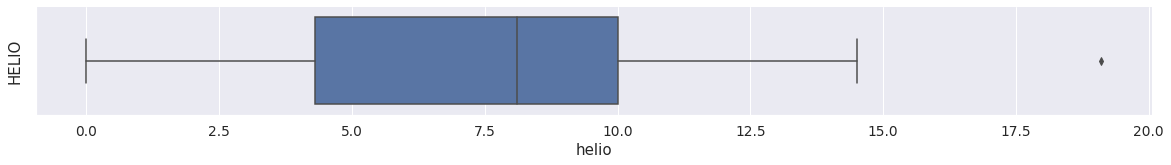

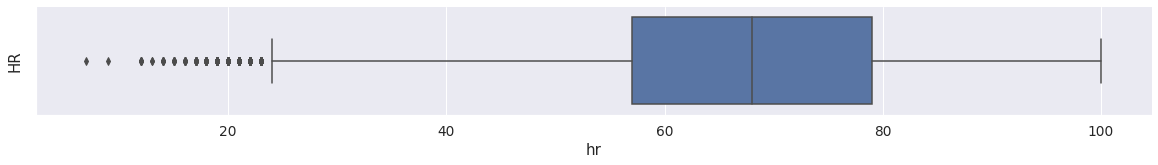

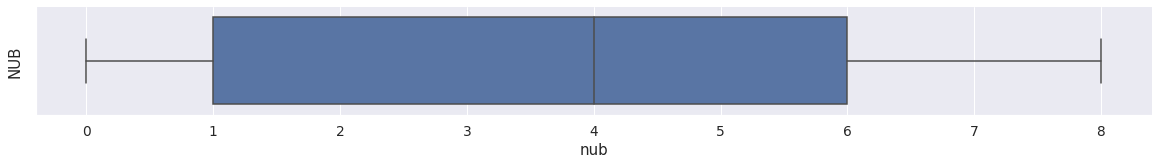

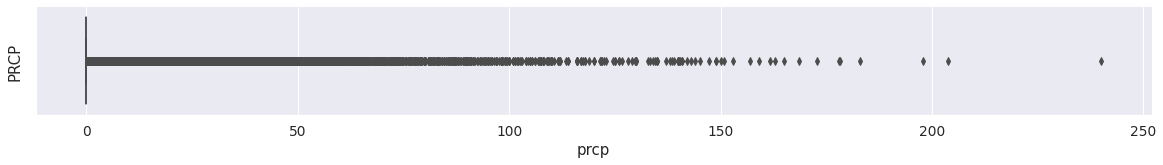

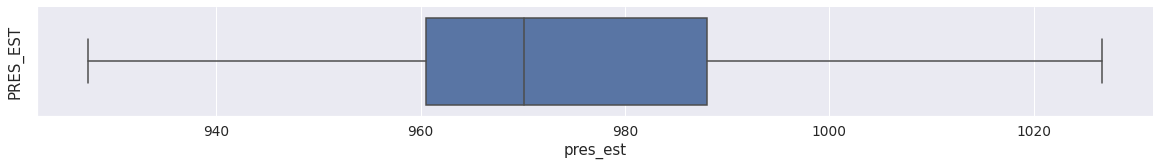

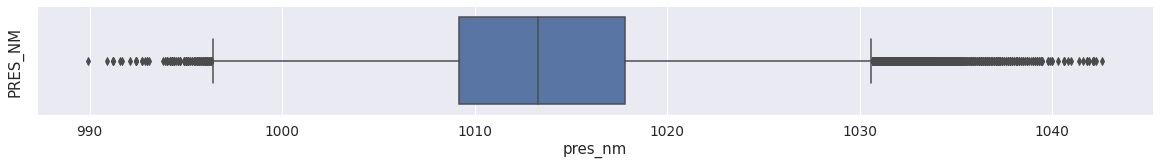

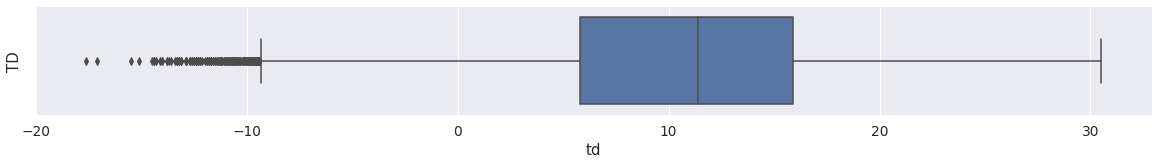

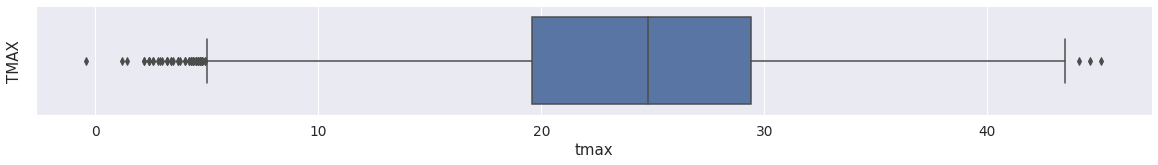

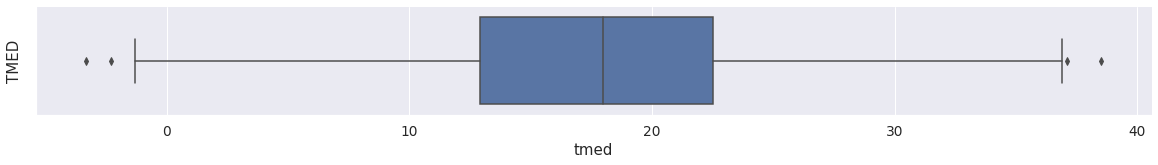

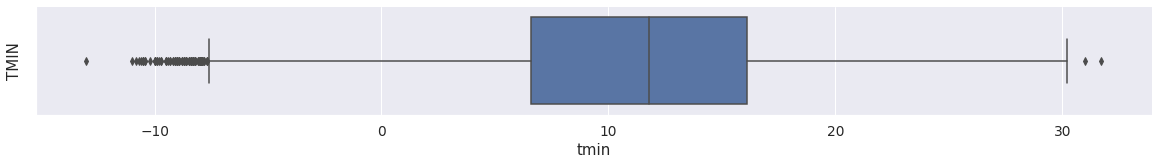

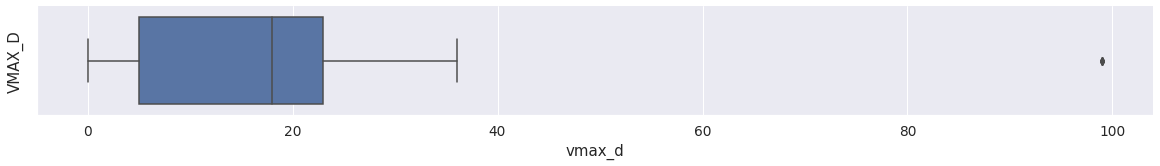

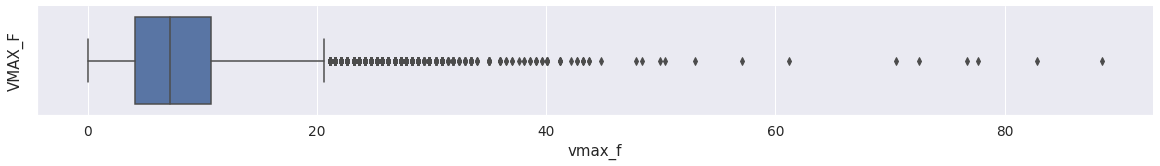

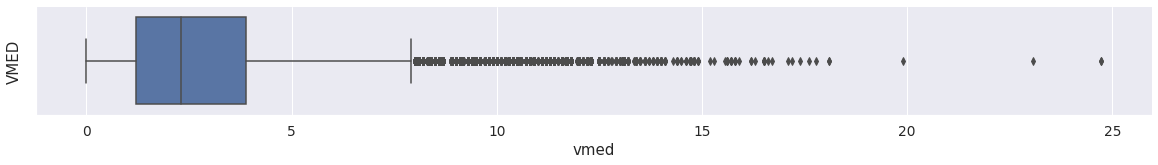

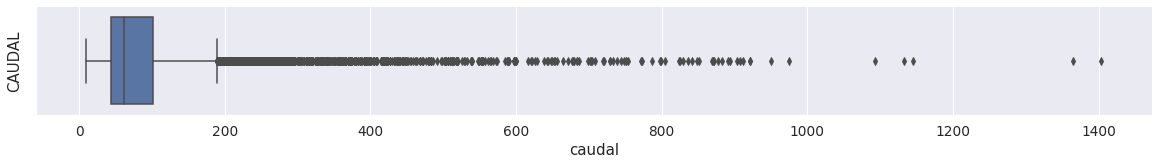

In [ ]:
not_numeric_cols = ['fecha', 'id', 'omm_id', 'hydro_year']
numeric_cols = [c for c in datos_dcor_filtered.columns if c not in not_numeric_cols]
for numeric_col in numeric_cols:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=datos_dcor,
                    x=numeric_col)
    plt.ylabel(numeric_col.upper())
    sns.despine()

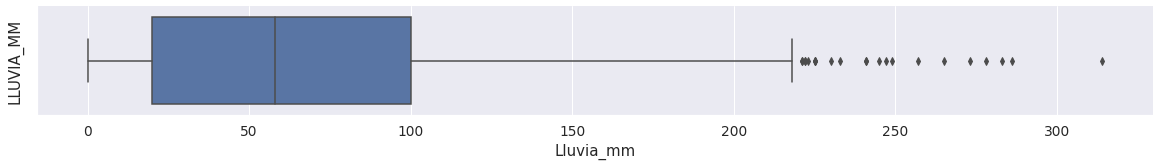

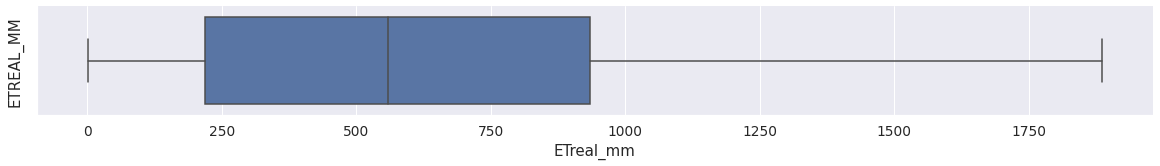

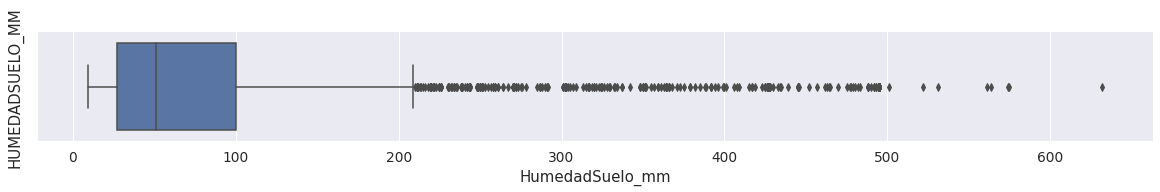

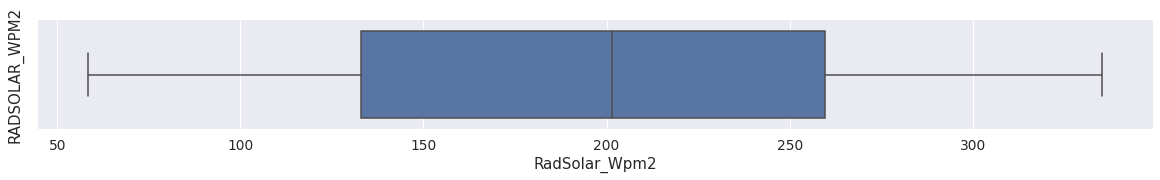

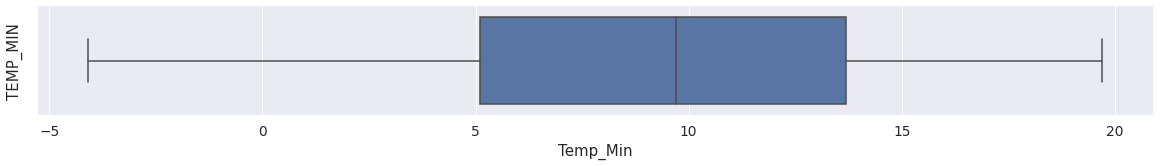

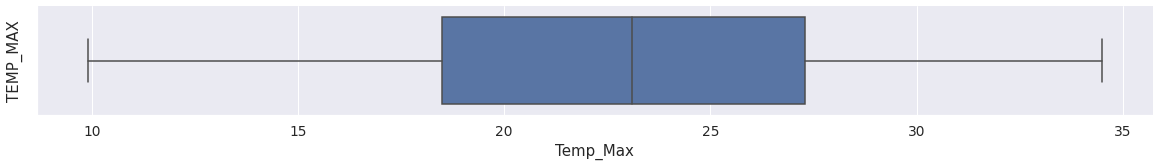

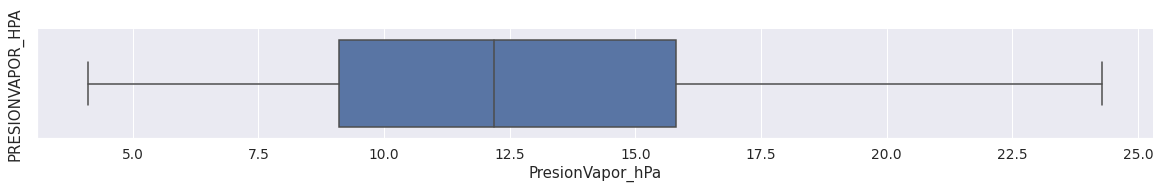

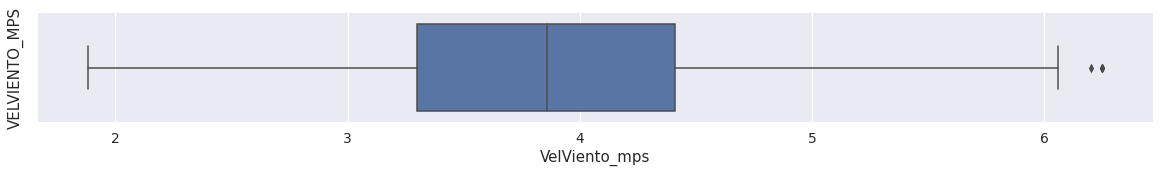

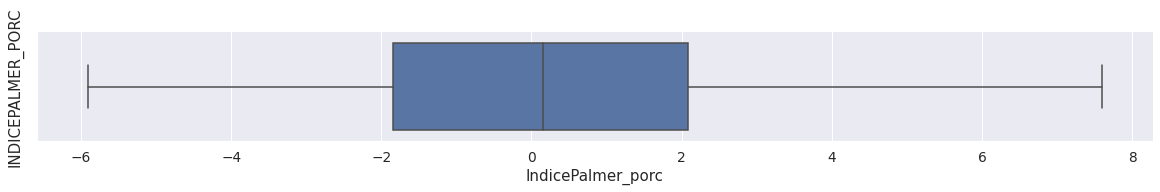

In [ ]:
not_numeric_cols = ['Date', 'id', 'omm_id', 'nombre', 'hydro_year']
numeric_cols = [c for c in datos_tc.columns if c not in not_numeric_cols]
for numeric_col in numeric_cols:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=datos_tc,
                    x=numeric_col)
    plt.ylabel(numeric_col.upper())
    sns.despine()

4. Utilizar el dataset de TerraClimate para rellenar los datos faltantes en "datos_diarios_cordoba.csv" y guardar como un dataset nuevo. Hacer esto para todas las variables salvo para lluvia.

In [ ]:
not_var_cols = ['fecha', 'id', 'omm_id', 'hydro_year', 'prcp']
var_cols = [c for c in datos_dcor.columns if c not in not_var_cols]
datos_dcor_fill = pd.DataFrame()

for col in var_cols:
  datos_dcor_fill[col] = datos_dcor_filtered.groupby(['omm_id','hydro_year'])[col].mean()
datos_dcor_fill['PTA'] = datos_dcor_filtered.groupby(['omm_id','hydro_year'])['prcp'].sum()
datos_dcor_fill['PMDA'] = datos_dcor_filtered.groupby(['omm_id','hydro_year'])['prcp'].max()
datos_dcor_fill

helio         hr  nub  pres_est  pres_nm         td  \
omm_id hydro_year                                                           
1      1957             NaN        NaN  NaN       NaN      NaN        NaN   
       1958             NaN        NaN  NaN       NaN      NaN        NaN   
       1959             NaN        NaN  NaN       NaN      NaN        NaN   
       1960             NaN        NaN  NaN       NaN      NaN        NaN   
       1961             NaN        NaN  NaN       NaN      NaN        NaN   
...                     ...        ...  ...       ...      ...        ...   
87466  2014        7.294928  64.293478  NaN       NaN      NaN  11.799638   
       2015        6.527824  73.264463  NaN       NaN      NaN  13.389532   
       2016        7.014835  73.531507  NaN       NaN      NaN  13.370959   
       2017        6.853333  70.358127  NaN       NaN      NaN  13.268320   
       2018        7.005096  70.041139  NaN       NaN      NaN  12.538608   

                        tmax  tmed       tmin  vmax_d  vmax_f      vmed  \
omm_id hydro_year                                                         
1      1957              NaN   NaN        NaN     NaN     NaN       NaN   
       1958              NaN   NaN        NaN     NaN     NaN       NaN   
       1959              NaN   NaN        NaN     NaN     NaN       NaN   
       1960              NaN   NaN        NaN     NaN     NaN       NaN   
       1961              NaN   NaN        NaN     NaN     NaN       NaN   
...                      ...   ...        ...     ...     ...       ...   
87466  2014        26.009880   NaN  12.645509     NaN     NaN  2.442701   
       2015        24.123626   NaN  12.406319     NaN     NaN  2.400826   
       2016        24.291507   NaN  11.542192     NaN     NaN  2.613973   
       2017        25.491813   NaN  12.180992     NaN     NaN  2.787017   
       2018        24.573502   NaN  11.505047     NaN     NaN  2.794603   

                   caudal     PTA   PMDA  
omm_id hydro_year                         
1      1957           NaN   441.3  159.0  
       1958           NaN   632.1   85.0  
       1959           NaN   724.7   72.0  
       1960           NaN  1085.9   97.0  
       1961           NaN   808.8   86.5  
...                   ...     ...    ...  
87466  2014           NaN   905.2   70.0  
       2015           NaN   967.7   77.0  
       2016           NaN   892.1  135.0  
       2017           NaN   792.7   72.0  
       2018           NaN   680.4  100.0  

[234 rows x 15 columns]

In [ ]:
#from google.colab import drive
#drive.mount('drive')

datos_dcor_2 = datos_dcor_fill.reset_index()
datos_tc_2 = datos_tc_var_mean.reset_index()
for index, row in datos_dcor_2.iterrows():
  if (math.isnan(row['tmax'])):
    omm = row['omm_id']
    hydro = row['hydro_year']
    try:
      dato = datos_tc_2.query("omm_id==@omm and hydro_year==@hydro").reset_index()
      datos_dcor_2.at[index, 'tmax'] = dato.loc[0, 'Temp_Max']
    except:
      continue
  if (math.isnan(row['tmin'])):
    omm = row['omm_id']
    hydro = row['hydro_year']
    try:
      dato = datos_tc_2.query("omm_id==@omm and hydro_year==@hydro").reset_index()
      datos_dcor_2.at[index, 'tmin'] = dato.loc[0, 'Temp_Min']
    except:
      continue
  if (math.isnan(row['vmed'])):
    omm = row['omm_id']
    hydro = row['hydro_year']
    try:
      dato = datos_tc_2.query("omm_id==@omm and hydro_year==@hydro").reset_index()
      datos_dcor_2.at[index, 'vmed'] = dato.loc[0, 'VelViento_mps']
    except:
      continue
#datos_dcor_2.to_csv('datos_anuales_cordoba.csv')
#!cp datos_anuales_cordoba.csv "drive/My Drive/"
datos_dcor_2

Mounted at drive


,omm_id,hydro_year,helio,hr,nub,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,PTA,PMDA
0,1,1957,NaN,NaN,NaN,NaN,NaN,NaN,22.320000,NaN,8.360000,NaN,NaN,3.946000,NaN,441.3,159.0
1,1,1958,NaN,NaN,NaN,NaN,NaN,NaN,19.916667,NaN,5.866667,NaN,NaN,4.153333,NaN,632.1,85.0
2,1,1959,NaN,NaN,NaN,NaN,NaN,NaN,21.208333,NaN,5.316667,NaN,NaN,4.045833,NaN,724.7,72.0
3,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,20.766667,NaN,5.975000,NaN,NaN,4.111667,NaN,1085.9,97.0
4,1,1961,NaN,NaN,NaN,NaN,NaN,NaN,20.650000,NaN,6.191667,NaN,NaN,4.167500,NaN,808.8,86.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,87466,2014,7.294928,64.293478,NaN,NaN,NaN,11.799638,26.009880,NaN,12.645509,NaN,NaN,2.442701,NaN,905.2,70.0
230,87466,2015,6.527824,73.264463,NaN,NaN,NaN,13.389532,24.123626,NaN,12.406319,NaN,NaN,2.400826,NaN,967.7,77.0
231,87466,2016,7.014835,73.531507,NaN,NaN,NaN,13.370959,24.291507,NaN,11.542192,NaN,NaN,2.613973,NaN,892.1,135.0
232,87466,2017,6.853333,70.358127,NaN,NaN,NaN,13.268320,25.491813,NaN,12.180992,NaN,NaN,2.787017,NaN,792.7,72.0


## 3. Análisis y curación de datos de un Excel y un TXT

Referencias CHIRPS: https://disasters.nasa.gov/instruments/imerg

  1. En cada año hidrológico, leer los datos de "CHIRPS.txt" y determinar la Precipitaciones Máximas Diarias Anuales (PMDA) y las Precipitaciones Totales Anuales para cada estación.
  2. Graficar y comparar los estadísticos de estos datasets con los de cada estación (dataset "datos_diarios_cordoba.csv").
  3. ¿Es posible rellenar la serie del dataset "datos_diarios_cordoba.csv"?
  4. Agregar los nuevos features al dataset creado en el punto 5 de la parte 2 y exportar el dataset nuevo en formato csv.
  5. A partir del dataset del punto 4, elaborar matrices de correlación entre las diferentes variables y las series de Precipitaciones Máximas Diarias Anuales (PMDA) para cada estación.

1. En cada año hidrológico, leer los datos de "CHIRPS.txt" y determinar la Precipitaciones Máximas Diarias Anuales (PMDA) y las Precipitaciones Totales Anuales (PTA) para cada estación.

In [ ]:
#Leemos los datos
datos_chirps = pd.read_table('https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/main/dataset/CHIRPS.txt', delim_whitespace=True)
datos_chirps

,Date,Pilar,RioCuarto,MarcosJuarez,LaFlorida
0,1/1/1981,0.000,0.000,0.000,0.000
1,1/2/1981,0.000,0.000,0.000,0.000
2,1/3/1981,0.000,0.000,0.000,0.000
3,1/4/1981,0.000,0.000,0.000,0.000
4,1/5/1981,2.722,1.306,5.644,4.166
...,...,...,...,...,...
14391,5/27/2020,0.000,0.000,0.000,0.000
14392,5/28/2020,0.000,0.000,0.112,0.000
14393,5/29/2020,0.000,0.000,0.000,0.000
14394,5/30/2020,0.000,0.000,3.977,0.952


In [ ]:
#Agregamos el año hidrologico
datos_chirps['Date'] = pd.to_datetime(datos_chirps['Date'])
datos_chirps['hydro_year'] = datos_chirps['Date'].apply(lambda Date: get_hydro_year(Date))
datos_chirps

,Date,Pilar,RioCuarto,MarcosJuarez,LaFlorida,hydro_year
0,1981-01-01,0.000,0.000,0.000,0.000,1980
1,1981-01-02,0.000,0.000,0.000,0.000,1980
2,1981-01-03,0.000,0.000,0.000,0.000,1980
3,1981-01-04,0.000,0.000,0.000,0.000,1980
4,1981-01-05,2.722,1.306,5.644,4.166,1980
...,...,...,...,...,...,...
14391,2020-05-27,0.000,0.000,0.000,0.000,2019
14392,2020-05-28,0.000,0.000,0.112,0.000,2019
14393,2020-05-29,0.000,0.000,0.000,0.000,2019
14394,2020-05-30,0.000,0.000,3.977,0.952,2019


In [ ]:
#Determinamos precipitaciones maximas diarias anuales (PMDA) por estacion
var_cols = ['Pilar', 'RioCuarto', 'MarcosJuarez', 'LaFlorida']
datos_chirps_pmda = pd.DataFrame()

for col in var_cols:
  datos_chirps_pmda[col] = datos_chirps.groupby('hydro_year')[col].max()

datos_chirps_pmda

,Pilar,RioCuarto,MarcosJuarez,LaFlorida
hydro_year,,,,
1980,74.631,65.068,52.395,31.218
1981,47.097,37.398,48.439,53.927
1982,54.701,34.628,63.315,36.664
1983,70.403,98.013,58.073,67.490
1984,47.211,37.549,41.537,37.502
1985,47.476,42.194,54.416,40.079
1986,60.069,45.633,57.149,44.594
1987,94.616,56.540,73.683,67.082
1988,37.886,73.563,67.311,42.550


In [ ]:
#Determinamos precipitaciones totales anuales (PTA) por estacion
var_cols = ['Pilar', 'RioCuarto', 'MarcosJuarez', 'LaFlorida']
datos_chirps_pta = pd.DataFrame()

for col in var_cols:
  datos_chirps_pta[col] = datos_chirps.groupby('hydro_year')[col].sum()

datos_chirps_pta

,Pilar,RioCuarto,MarcosJuarez,LaFlorida
hydro_year,,,,
1980,687.476,549.390,634.614,483.218
1981,697.279,758.484,771.613,609.340
1982,919.229,861.065,844.697,622.737
1983,927.240,940.037,1068.800,664.398
1984,736.536,698.787,682.288,553.137
1985,677.287,808.246,878.212,648.398
1986,871.588,841.102,931.737,700.019
1987,723.391,741.915,846.701,624.629
1988,540.803,704.507,709.053,513.802


2. Graficar y comparar los estadísticos de este dataset con los de cada estación del dataset "datos_diarios_cordoba.csv".

Text(0.5, 1.0, 'PMDA')

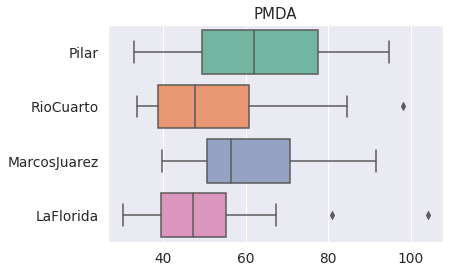

In [ ]:
#Graficamos los valores de PMDA de cada estación de CHIRPS
sns.boxplot(data=datos_chirps_pmda, orient="h", palette="Set2").set_title('PMDA')

Text(0.5, 1.0, 'PTA')

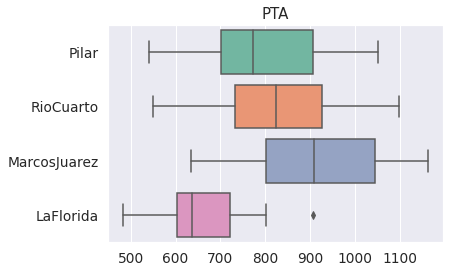

In [ ]:
#Graficamos los valores de PTA de cada estación de CHIRPS
sns.boxplot(data=datos_chirps_pta, orient="h", palette="Set2").set_title('PTA')

Antes de graficar los datos de "datos_diarios_cordoba.csv", le agregamos una columna con los nombres de las estaciones meteorológicas.

In [ ]:
#Copiamos el dataframe de "datos_diarios_cordoba.csv" que contiene el año hidrologico
datos_dc = datos_dcor.copy()
#Importamos el dataset con los datos de la estaciones meteorológicas
ruta = 'https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/master/dataset/'
id_Datos = pd.read_csv(ruta + "metadatos_estaciones.csv")
#Agregamos a datos_dc una columna con el nombre de la estación
stations = id_Datos.set_index('omm_id')['nombre'].to_dict()
datos_dc['nombre'] = datos_dc['omm_id'].replace(stations)
#Visualizamos las estaciones que se presentan en este dataset
datos_dc['nombre'].unique()

,id,omm_id,fecha,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,hydro_year,nombre
0,1,87244,1961-01-01,NaN,62.0,0.0,0.0,965.9,NaN,15.9,32.3,25.1,13.5,NaN,NaN,1.0,NaN,1960,Villa Maria del Rio Seco
1,2,87244,1961-01-02,NaN,66.0,6.0,28.0,969.9,NaN,15.5,27.5,22.2,18.3,NaN,NaN,1.0,NaN,1960,Villa Maria del Rio Seco
2,3,87244,1961-01-03,NaN,92.0,8.0,15.4,972.6,NaN,13.1,21.7,14.4,12.9,NaN,NaN,4.5,NaN,1960,Villa Maria del Rio Seco
3,4,87244,1961-01-04,NaN,84.0,5.0,0.0,969.6,NaN,17.4,23.1,20.4,13.9,NaN,NaN,0.3,NaN,1960,Villa Maria del Rio Seco
4,5,87244,1961-01-05,NaN,84.0,5.0,3.6,965.6,NaN,17.8,23.9,20.7,15.5,NaN,NaN,1.5,NaN,1960,Villa Maria del Rio Seco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249622,249623,2,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50303,2017,Pueblo Andino
249623,249624,2,2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.93904,2017,Pueblo Andino
249624,249625,2,2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33246,2017,Pueblo Andino
249625,249626,2,2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.72549,2017,Pueblo Andino


In [ ]:
#Determinamos precipitaciones totales anuales (PTA) por estacion
datos_dc = datos_dc.query('nombre == "Pilar Obs." | nombre == "Rio Cuarto Aero" | nombre == "Marcos Juarez INTA" | nombre == "Marcos Juarez Aero" | nombre == "La Florida"')
datos_dc_stations = pd.DataFrame()
datos_dc_stations['hydro_year']=datos_dc['hydro_year'].unique()
datos_dc_stations.sort_values(by=['hydro_year'], inplace=True, ascending=True)
datos_dc_stations.set_index('hydro_year', inplace=True)
st_int = ['Pilar Obs.','Rio Cuarto Aero', 'Marcos Juarez INTA', 'Marcos Juarez Aero', 'La Florida']
for st in st_int:
  datos_dc_stations[st]=pd.Series(datos_dc.groupby('hydro_year', 'nombre'==st)['prcp'])
datos_dc_stations

,Pilar Obs.,Rio Cuarto Aero,Marcos Juarez INTA,Marcos Juarez Aero,La Florida
hydro_year,,,,,
1957,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2015,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN


## 4. Análisis y curación de Índices Climáticos en Excel

Referencias: https://psl.noaa.gov/data/climateindices/list/

  1. Leer el archivo "indices_clim.xlsx" y evaluar la cantidad de valores faltantes.
  2. Convertir los datos faltantes en NaN.
  3. Hacer matrices de correlación entre los diferentes índices climáticos y las series de Precipitaciones Máximas Diarias Anuales (PMDA) en las diferentes estaciones. Hacer esto para cada año hidrológico.
  4. Repetir lo mismo para la serie de caudales máximos diarios anuales (QMDA) en Pueblo Andino.

### 4.a) Cargando el conjunto de datos

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

url='https://github.com/Rondamon/2022_Mentoria_LluviasExtremas/blob/main/dataset/indices_clim.xlsx?raw=true'
with pd.ExcelFile(url) as xls:
  db_index=pd.read_excel(url,parse_dates = True, index_col='date')
  
# db_index.columns.to_list
db_index.head(3)

,SOI,PNA,NAO,Jones NAO,GBI,EPO,TNH,ONI,NTA,CAR,...,Solar Flux,MDR minus Tropics SST anomalies,Central India Monsoon Precipitation,Sahel Monsoon Precipitation,Brazil Monsoon Precipitation,SW USA Monsoon Precipitation,Global Land-Ocean Temperature Index,ENSO Precipitation Index,Global Integrated Angular Momentum GLAAM,MDR SST Anomalies
date,,,,,,,,,,,,,,,,,,,,,
1948-01-01,NaN,NaN,NaN,1.53,5087.053,NaN,NaN,NaN,NaN,NaN,...,1557.0,0.32,318.0,-5.0,-92.0,0.38,7.0,NaN,NaN,0.19
1948-01-01,NaN,NaN,NaN,0.66,5062.317,NaN,NaN,NaN,NaN,NaN,...,1343.0,0.13,58.0,7.0,-80.0,1.60,-15.0,NaN,NaN,0.04
1948-01-01,NaN,NaN,NaN,3.48,5048.031,NaN,NaN,NaN,NaN,NaN,...,1355.0,0.14,37.0,-6.0,99.0,1.12,-25.0,NaN,NaN,0.23


### * Evaluando la cantidad de variables así como sus valores faltantes:

In [ ]:
db_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 876 entries, 1948-01-01 to 2020-01-01
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   SOI                                       833 non-null    float64
 1   PNA                                       845 non-null    float64
 2   NAO                                       845 non-null    float64
 3   Jones NAO                                 643 non-null    float64
 4   GBI                                       809 non-null    float64
 5   EPO                                       775 non-null    float64
 6   TNH                                       191 non-null    float64
 7   ONI                                       844 non-null    float64
 8   NTA                                       841 non-null    float64
 9   CAR                                       841 non-null    float64
 10  MEI v2             

### * Como se puede notar en la anterior contamos con 876 registros para cada una de las 43 posibles variables. A demás se puede resaltar que 5 variables: BEST, TNA, TSA, QBO, WHWP, AMO cuentan con 869 registros y son las más completas de la Base de Datos (BBDD). A su vez se destaca que en general el conjunto es de tipo flotante. 

### * Creamos una copia del dataframe `db_index` y lo denominamos `df`. Posteriormente, rellenamos cada uno de los valores faltantes con el argumento `np.nan`:

In [ ]:
df = db_index.copy()
df.fillna(np.nan, inplace=True)

### * Contabilizamos la cantidad de valores faltantes por variable (ordenados de menor a mayor):

In [ ]:
# Valores Faltantes:
missing_values_count = df.isna().sum()
missing_values_count.sort_values()

QBO                                           7
WHWP                                          7
TSA                                           7
TNA                                           7
AMO                                           7
BEST                                          7
PMM                                           9
Trans-Nino Index TNI                          9
Nort Pacific Index NP                         9
Global Land-Ocean Temperature Index          17
Solar Flux                                   21
PDO                                          27
PNA                                          31
Western Pacific Index                        31
NAO                                          31
Arctic Oscilation AO                         31
Nino 3+4                                     31
Nino 1+2                                     31
Nino 3                                       31
Nino 4                                       31
ONI                                     

### * Calculamos el porcentaje de datos faltantes sobre el conjunto de datos:

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f'porcentaje de faltantes en la base de datos: {((total_missing/total_cells) * 100):2f}')

porcentaje de faltantes en la base de datos: 13.690847


### * Ahora lo caracterizamos visualmente:
- Matriz de datos:

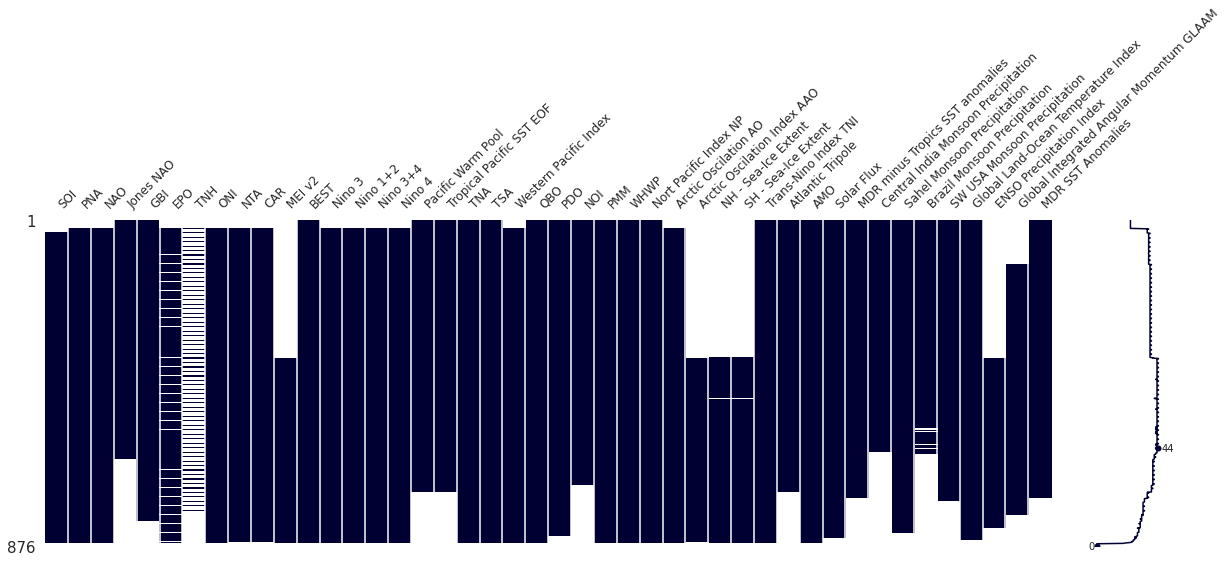

In [ ]:
import missingno as msno
msno.matrix(df,figsize=(20, 6), fontsize=12, color=[0,0,0.2])

- Ordenados según la variable TSA:

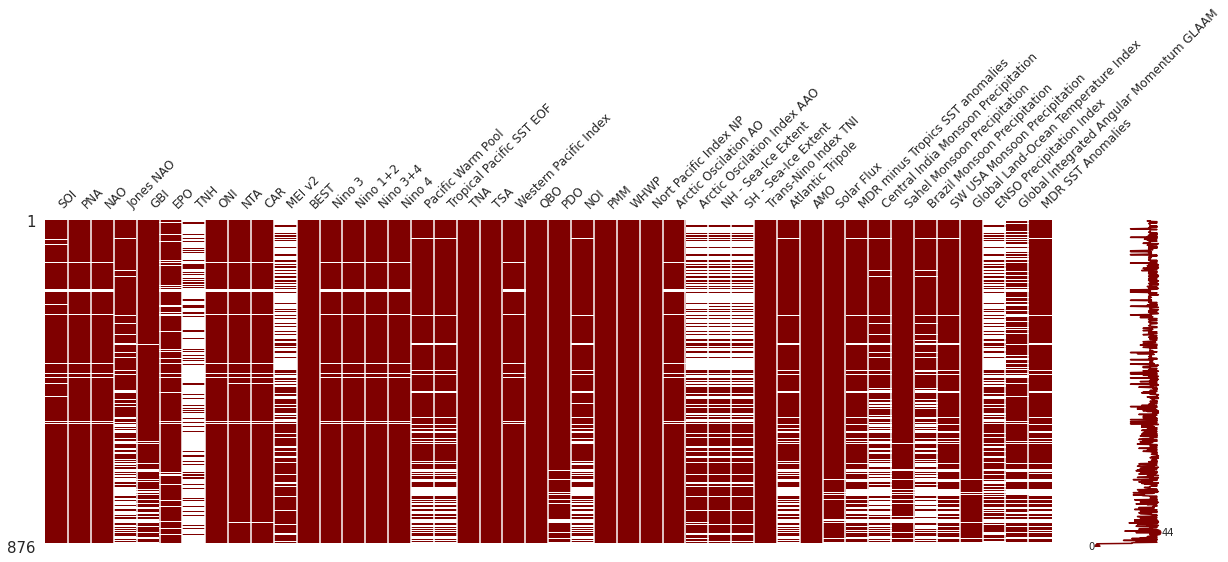

In [ ]:
sorted = df.sort_values('TSA')
msno.matrix(sorted,figsize=(20, 6), fontsize=12, color=[0.5,0,0])

Revisar:

Tenemos que BEST, TNA, TSA, QBO, WHWP, AMO presentan 7 valores con NaN. Decidimos entonces que los imputaremos dado metodo `SimpleImputer` combinado con el valor que arroje `median()`:

In [ ]:
from sklearn.impute import SimpleImputer

values = ["BEST", "TNA", "TSA", "QBO","WHWP", "AMO"],#'PMM', "Trans-Nino Index TNI", "Nort Pacific Index NP"]

for i, value in enumerate(values):
  globals()[f'mediana_{values[i]}'] = db_index[values[i]].median()
  print(f'mediana_{values[i]}:')
  print(globals()[f'mediana_{values[i]}'])

  db_index[values[i]].fillna(globals()[f'mediana_{values[i]}'], inplace = True)

  globals()[f'missing_values_{values[i]}'] = db_index[values[i]].isna().sum()
  print(f'missing_values_{values[i]}:')
  print(globals()[f'missing_values_{values[i]}'])
  print("------ ------ ------ ------ ------ ------ ------ ")

 

mediana_['BEST', 'TNA', 'TSA', 'QBO', 'WHWP', 'AMO']:
BEST    0.060
TNA     0.080
TSA     0.070
QBO    -2.510
WHWP   -0.040
AMO    -0.001
dtype: float64
missing_values_['BEST', 'TNA', 'TSA', 'QBO', 'WHWP', 'AMO']:
BEST    7
TNA     7
TSA     7
QBO     7
WHWP    7
AMO     7
dtype: int64
------ ------ ------ ------ ------ ------ ------ 


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
